In [1]:
import os 
from scripts import snipPdf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import chardet as chardet
import requests
from bs4 import BeautifulSoup
from alive_progress import alive_bar
from alive_progress import alive_it
from scripts import print_pdf

In [4]:
def get_encoding(file):
        with open(file, 'rb') as f:
            result = chardet.detect(f.read())
        return result['encoding']
file_path = 'C:/Users/Jens/data_sienc_visuel/data2/Resultat2.csv'
encoding = get_encoding(file_path)
print(encoding)


utf-16le


In [5]:
df = pd.read_csv(file_path, encoding=encoding, sep=';')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         57806 non-null  object 
 1   DokumentType                 57806 non-null  object 
 2   Titel                        57806 non-null  object 
 3   PopulærTitel                 1373 non-null   object 
 4   Ressort                      57806 non-null  object 
 5   AdministrerendeMyndighed     42568 non-null  object 
 6   JournalNummer                55179 non-null  object 
 7   Nummer                       57806 non-null  int64  
 8   År                           57806 non-null  int64  
 9   DokumentId                   57806 non-null  object 
 10  ACCN                         57806 non-null  object 
 11  Publiceringsmedie            57806 non-null  object 
 12  UndtagetFraOffentliggørelse  133 non-null    object 
 13  GeografiskDæknin

C:\Users\Jens\AppData\Local\Temp\ipykernel_30280\3808103124.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding, sep=';')


In [ ]:
import os
accn = []
for object in df['ACCN']: 
    accn.append(object)

In [ ]:
file_namesFF=[]
def get_file_names(directory):
    file_namesT = []
    for dir in directory:
        for root, dirs, files in os.walk(dir):
            for file in files:
                split_file= file.split(".")
                file_name = split_file[0]
                file_namesT.append(file_name)     
    return file_namesT
# Example usage
directory_path = ['D:/school/ALL_PDFs/snip5']
file_namesFF = get_file_names(directory_path)
print(len(file_namesFF))

In [ ]:
import numpy as np

# Define the two arrays


# Find the non-duplicate elements
non_duplicates = np.setdiff1d(accn, file_names)

# Print the non-duplicates
print(len(non_duplicates))
print(non_duplicates)

In [ ]:
file_names1=[]
file_paths = []
def get_file_names(directory):
    file_namesT = []
    file_paths = []
    count = 0
    for dir in directory:
        for root, dirs, files in os.walk(dir):
            for file in files:
                split_file= file.split(".")
                file_name = split_file[0]
                for object in non_duplicates:
                    if object == file_name:
                        file_namesT.append(file_name)   
                        file_path = root+"/"+file
                        file_paths.append(file_path)
                count += 1    
                print(count)
    return file_namesT, file_paths
# Example usage
directory_path = ['D:/school/ALL_PDFs/well_structured','D:/school/ALL_PDFs/print']
file_names1,file_paths = get_file_names(directory_path)
print(len(file_names1))
print(len(file_paths))
print(file_paths[48])

In [ ]:
print(len(file_names1))
print(len(file_paths))
print(file_paths[48])

In [5]:
file_names1=[]
file_paths = []
def get_file_names(directory):
    file_namesT = []
    file_paths = []
    for dir in directory:
        for root, dirs, files in os.walk(dir):
            for file in files:
                file_path = root+"/"+file
                file_paths.append(file_path)
                split_file= file.split(".")
                file_name = split_file[0]
                file_namesT.append(file_name)     
    return file_namesT, file_paths
# Example usage
directory_path = ['C:/Users/Jens/data_sienc_visuel/data/pdf/well_structured','C:/Users/Jens/data_sienc_visuel/data/pdf/print']
file_names1,file_paths = get_file_names(directory_path)
print(len(file_names1))
print(len(file_paths))
print(file_paths[0])

91
91
C:/Users/Jens/data_sienc_visuel/data/pdf/well_structured/A20140051130.pdf


In [6]:
urls_pdf = []
file_names = []
def make_urls_and_file_names(files):
    urls_pdfT = []
    file_namesT = []
    count = 0
    for file in files:
        file_namesT.append(file)
        urls_pdfT.append("https://www.retsinformation.dk/eli/accn/" + file)
        count += 1    
    print(count)    
    return urls_pdfT,file_namesT

urls_pdf, file_names = make_urls_and_file_names(file_names1)

print(len(urls_pdf))
print(len(file_names))

91
91
91


In [ ]:

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [ ]:
import pprint
chunksed_filenamses = []

chunksed_filenamses = list(chunks(file_names, 1))  
chunksed_urls_pdf = list(chunks(urls_pdf, 1))
chunksed_file_paths = list(chunks(file_paths, 1))  


In [ ]:
compined_lengt = 0

for i in range(len(chunksed_filenamses)):
    compined_lengt += len(chunksed_filenamses[i])
    
print(compined_lengt)    

In [ ]:
part = 0


print(len(chunksed_urls_pdf[part]))
print(chunksed_urls_pdf[part])
print(len(chunksed_filenamses[part]))
print(chunksed_filenamses[part])
print(len(chunksed_file_paths[part]))
print(chunksed_file_paths[part])

In [ ]:
import asyncio

def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, lambda: f(*args, **kwargs))
    return wrapped

@background
def snipBacground(file_paths, file_names): 
    snipPdf.run(file_paths, file_names)

In [ ]:
snipPdf.run(file_paths, file_names)

In [ ]:
import asyncio


def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
    return wrapped

@background
def snipMandSave(file_paths,part):
    snipPdf.run(file_paths,part)
    

for i in range(len(chunksed_file_paths)):
    snipMandSave(chunksed_file_paths[i],chunksed_filenamses[i])   


In [ ]:
docs = []

In [ ]:
import pandas as pd 
import chardet as chardet

def get_encoding(file):
    with open(file, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']
file_path = 'C:/Users/Jens/data_sienc_visuel/data/Resultat2.csv'
encoding = get_encoding(file_path)
print(encoding)

In [ ]:
df = pd.read_csv(file_path, encoding=encoding, sep=';')
df.info() 

In [ ]:
import pickle
with open('D:/school/ALL_PDFs/snips2/A20080008930.pkl', 'rb') as f:
    docs2 = pickle.load(f)

In [7]:
##TESTER FOR BAD DOCS
testfilenames = file_names
import pickle

testDocs = []
for file_name in testfilenames:
    with open('D:/school/ALL_PDFs/snip5/'+file_name+'.pkl', 'rb') as f:
        docs = pickle.load(f)
        testDocs.append(docs)
        f.close()

In [8]:
len(testDocs)

91

In [9]:
tokenmax = 7000
maxCareterLenght = 2 * tokenmax

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
  
def Snipper(text):
    concatenated_content = "\n\n\n --- \n\n\n".join(text)
    text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=tokenmax, chunk_overlap=0)   
    texts_splits = text_splitter.split_text(text)
    return texts_splits   

In [11]:
from langchain_community.docstore.document import Document
docs2 = []
for doc in testDocs:
    tokenSemantic_snippet = []
    for semantic_snippet in doc:
        snipCareterLength = len(semantic_snippet.page_content)
        if snipCareterLength > maxCareterLenght:
            texts_splits = Snipper(semantic_snippet.page_content)
            count = 0
            for text_split in texts_splits:
                count += 1
                metadata = {'heading':semantic_snippet.metadata['heading']+str(count) ,'content_fontM':semantic_snippet.metadata['content_fontM'] , 'heading_fontM':semantic_snippet.metadata['heading_fontM'] , 'content_fontS': semantic_snippet.metadata['content_fontS'] , 'heading_fontS': semantic_snippet.metadata['heading_fontS'] , 'content_has_h_elem':semantic_snippet.metadata['content_has_h_elem'] , 'heading_has_h_elem':semantic_snippet.metadata['heading_has_h_elem']}
                tokenSemantic_snippet.append(Document(page_content=text_split,metadata=metadata))
        else:
            tokenSemantic_snippet.append(Document(page_content=semantic_snippet.page_content,metadata=semantic_snippet.metadata))
    docs2.append(tokenSemantic_snippet)                
                
            
print(len(docs2))                

91


In [ ]:
count = 0
totalErrorFilels = 0
totalErrorAmount = 0
for doc in docs2: 
    count += 1
    snipcount= 0
    fileErrorCount = 0
    for semantic_snippet in doc:
        snipcount += 1
        if len(semantic_snippet.page_content) > maxCareterLenght:
            print('ERROR AT FILE:  ',count)
            print('ERROR AT SNIPPET:  ',snipcount)
            print('AMOUNT of ERRORS in file:  ',fileErrorCount)
            print('PAGE_CONTENT_LENGT_TOKENS: ',len(semantic_snippet.page_content)/2)
            print('-------------------------------')
            fileErrorCount += 1   
    if fileErrorCount > 0:
        totalErrorAmount += fileErrorCount
        totalErrorFilels += 1 
        print('ERROR AT FILE:  ',count)
        print('AMOUNT of ERRORS in file:  ',fileErrorCount)
        print('--------------------------------------------') 
        print('_________________________NEW_FILE__________________________')
if totalErrorFilels > 0:      
    print('____________________________________________________END______________________________________________________')        
    print('TOTAL ERROR FILES:  ',totalErrorFilels) 
    print('TOTAL ERROR AMOUNT:  ',totalErrorAmount)
    print('AVAGE ERROR AMOUNT PER FILE:  ',totalErrorAmount/totalErrorFilels)              
     
                 
            

In [ ]:
import pickle

docs2 = []
for file_name in file_names:
    with open('D:/school/ALL_PDFs/snip5/'+file_name+'.pkl', 'rb') as f:
        docs = pickle.load(f)
        docs2.append(docs)
        f.close()

In [ ]:
print(len(docs2))

In [ ]:
for semantic_snippet in docs2[0]:
    print('HEADING:  ',semantic_snippet.metadata['heading'])
    print('-----------------')
    print()
    print('CONTENT_LENGT:  ',len(semantic_snippet.page_content))
    print()
    print('CONTENT_ESTIMATET_TOKEN:  ',len(semantic_snippet.page_content)/4)
    print()
    print('-----------------')
    print()
    print('CONTENT_FIRST_500C:')
    print()
    print(semantic_snippet.page_content[:500])
    print('---------------------------------------------------------------------------------')
    print()

In [12]:
def getAccnFromPath(path):
    split_path = path.split("/")
    file_name = split_path[-1]
    split_file_name = file_name.split(".")
    accn = split_file_name[0]
    return accn

In [13]:
def getrowFromAccn(row,rowV):
    variablesRow = row[rowV]
    result = str(variablesRow.values[0])
    return result

In [14]:
def getAllmetadata(accn,df):
  row = df.loc[df['ACCN'] == accn]
  EliUrl = getrowFromAccn(row,'EliUrl')
  Rank = getrowFromAccn(row,'Rank')
  DokumentType = getrowFromAccn(row,'DokumentType')
  Titel = getrowFromAccn(row,'Titel')
  PopulærTitel = getrowFromAccn(row,'PopulærTitel')
  Ressort = getrowFromAccn(row,'Ressort')
  AdministrerendeMyndighed = getrowFromAccn(row,'AdministrerendeMyndighed')
  År = getrowFromAccn(row,'År')
  Accn = getrowFromAccn(row,'ACCN')
  PubliceretTidspunkt = getrowFromAccn(row,'PubliceretTidspunkt')
  SidstPubliceretTidspunkt = getrowFromAccn(row,'SidstPubliceretTidspunkt')
  HjemmelVedroerer = getrowFromAccn(row,'HjemmelVedroerer')
  metadata = {'snipheading':'','EliUrl':EliUrl,'Rank':Rank,'DokumentType':DokumentType,'Titel':Titel,'PopulærTitel':PopulærTitel,'Ressort':Ressort,'AdministrerendeMyndighed':AdministrerendeMyndighed,'År':År,'ACCN':Accn,'PubliceretTidspunkt':PubliceretTidspunkt,'SidstPubliceretTidspunkt':SidstPubliceretTidspunkt,'HjemmelVedroerer':HjemmelVedroerer}
  return metadata
  

  


  
          



In [15]:
def getTitelfromAccn(accn,df):
    row = df.loc[df['ACCN'] == accn]
    variablesRow = row['Titel']
    result = str(variablesRow.values[0])
    return result

In [16]:
def getAccnFromTitel(titel,df):
    row = df
    variables = row.loc[row['Titel'] == titel]
    variablesRow = variables['ACCN']
    result = str(variablesRow.values[0])
    return result

In [17]:
from langchain_community.docstore.document import Document

newDocs = []

for doc in docs2:
    accn = getAccnFromPath(doc[0].metadata['source'])
    metadataNoSnipH = getAllmetadata(accn,df)
    state = 1
    newSemantic_snippet = []
    for semantic_snippet in doc:
        if str('Om\n').strip() == str(semantic_snippet.metadata['heading']).strip():
            state = 0
        if state == 1:
            metadata = {'snipheading':semantic_snippet.metadata['heading'],'EliUrl':metadataNoSnipH['EliUrl'],'Rank':metadataNoSnipH['Rank'],'DokumentType':metadataNoSnipH['DokumentType'],'Titel':metadataNoSnipH['Titel'],'PopulærTitel':metadataNoSnipH['PopulærTitel'],'Ressort':metadataNoSnipH['Ressort'],'AdministrerendeMyndighed':metadataNoSnipH['AdministrerendeMyndighed'],'År':metadataNoSnipH['År'],'ACCN':metadataNoSnipH['ACCN'],'PubliceretTidspunkt':metadataNoSnipH['PubliceretTidspunkt'],'SidstPubliceretTidspunkt':metadataNoSnipH['SidstPubliceretTidspunkt'],'HjemmelVedroerer':metadataNoSnipH['HjemmelVedroerer']}
            newSemantic_snippet.append(Document(page_content=semantic_snippet.page_content, metadata=metadata))
    newDocs.append(newSemantic_snippet)        
     

In [ ]:
for semantic_snippet in newDocs[0]:
    print('snipHEADING:  ',semantic_snippet.metadata['snipheading']) 
    print('-----------------')
    print()
    print('meta:  ',semantic_snippet.metadata)
    print()
    print('CONTENT_LENGT:  ',len(semantic_snippet.page_content))
    print()
    print('CONTENT_ESTIMATET_TOKEN:  ',len(semantic_snippet.page_content)/5)
    print()
    print('-----------------')
    print()
    print('CONTENT_FIRST_500C:')
    print()
    print(semantic_snippet.page_content[:500])
    print('---------------------------------------------------------------------------------')
    print()

In [ ]:
count = 0
totalErrorFilels = 0
totalErrorAmount = 0
for doc in newDocs: 
    count += 1
    snipcount= 0
    fileErrorCount = 0
    for semantic_snippet in doc:
        snipcount += 1
        if len(semantic_snippet.page_content) > maxCareterLenght:
            print('ERROR AT FILE:  ',count)
            print('ERROR AT SNIPPET:  ',snipcount)
            print('AMOUNT of ERRORS in file:  ',fileErrorCount)
            print('PAGE_CONTENT_LENGT_TOKENS: ',len(semantic_snippet.page_content)/2)
            print('-------------------------------')
            fileErrorCount += 1   
    if fileErrorCount > 0:
        totalErrorAmount += fileErrorCount
        totalErrorFilels += 1 
        print('ERROR AT FILE:  ',count)
        print('AMOUNT of ERRORS in file:  ',fileErrorCount)
        print('--------------------------------------------') 
        print('_________________________NEW_FILE__________________________')
if totalErrorFilels > 0:      
    print('____________________________________________________END______________________________________________________')        
    print('TOTAL ERROR FILES:  ',totalErrorFilels) 
    print('TOTAL ERROR AMOUNT:  ',totalErrorAmount)
    print('AVAGE ERROR AMOUNT PER FILE:  ',totalErrorAmount/totalErrorFilels)    

    

In [19]:
len(newDocs)

91

In [20]:
tokenDocs = []
for doc in newDocs:
    cur_idx = -1
    tokenSemantic_snippet = []
    for semantic_snippet in doc:
        snipCareterLength = len(semantic_snippet.page_content)
        if not tokenSemantic_snippet or (snipCareterLength + len(tokenSemantic_snippet[cur_idx].page_content)) >= maxCareterLenght:
            tokenSemantic_snippet.append(Document(page_content=semantic_snippet.page_content, metadata=semantic_snippet.metadata))
            cur_idx += 1
            continue
        
        if (snipCareterLength + len(tokenSemantic_snippet[cur_idx].page_content)) <= maxCareterLenght:
            tokenSemantic_snippet[cur_idx].page_content += semantic_snippet.page_content
            continue
        print('error')
    tokenDocs.append(tokenSemantic_snippet)

print(len(tokenDocs))            
        

91


In [ ]:
combined_snipCount = 0
for doc in tokenDocs: 
    snip_count = 0 
    print('DOC_TITEL: ',doc[0].metadata['Titel'])
    for semantic_snippet in doc:
        snip_count += 1
        print('snipHEADING:  ',semantic_snippet.metadata['snipheading']) 
        print('-----------------')
        print()
        print()
        print('CONTENT_LENGT:  ',len(semantic_snippet.page_content))
        print()
        print('CONTENT_ESTIMATET_TOKEN:  ',len(semantic_snippet.page_content)/3)
        print('-------------------------')  
    print('---------------------------------------------------------------------------------------------')
    print('DOC_TITEL: ',doc[0].metadata['Titel'])
    print()
    print('DOC_SNIP_COUNT: ',snip_count)
    print('---------------------------------------------------------------------------------------------')
    print('________________NEW_DOC________________________')
    print()
    combined_snipCount += snip_count
    

In [ ]:
count = 0
totalErrorFilels = 0
totalErrorAmount = 0
for doc in tokenDocs: 
    count += 1
    snipcount= 0
    fileErrorCount = 0
    for semantic_snippet in doc:
        snipcount += 1
        if len(semantic_snippet.page_content) > maxCareterLenght:
            print('ERROR AT FILE:  ',count)
            print('ERROR AT SNIPPET:  ',snipcount)
            print('AMOUNT of ERRORS in file:  ',fileErrorCount)
            print('PAGE_CONTENT_LENGT_TOKENS: ',len(semantic_snippet.page_content)/3)
            print('-------------------------------')
            fileErrorCount += 1   
    if fileErrorCount > 0:
        totalErrorAmount += fileErrorCount
        totalErrorFilels += 1 
        print('ERROR AT FILE:  ',count)
        print('AMOUNT of ERRORS in file:  ',fileErrorCount)
        print('--------------------------------------------') 
        print('_________________________NEW_FILE__________________________')
if totalErrorFilels > 0:      
    print('____________________________________________________END______________________________________________________')        
    print('TOTAL ERROR FILES:  ',totalErrorFilels) 
    print('TOTAL ERROR AMOUNT:  ',totalErrorAmount)
    print('AVAGE ERROR AMOUNT PER FILE:  ',totalErrorAmount/totalErrorFilels)   

In [25]:
combined_snipCount

1805

In [6]:
save_pathBig = f'D:/school/ALL_PDFs/snip7000t/BIG.pkl'

In [ ]:
import gc
gc.collect()
with open(save_pathBig, 'wb') as outp:
    pickle.dump(tokenDocs, outp, pickle.HIGHEST_PROTOCOL)
gc.collect()

In [7]:
import pickle
with open(save_pathBig, 'rb') as f:
        tokenDocs = pickle.load(f)
        f.close()

In [8]:
len(tokenDocs)

57802

In [9]:
import matplotlib.pyplot as plt
import tiktoken

tokenmax = 7000
maxCareterLenght = 2 * tokenmax

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [10]:
finaldocs = []
finaldocs = tokenDocs[0]
count = 0
for doc in tokenDocs: 
    if count == 0:
        count += 1
        continue
    finaldocs.extend([*doc]) 
print(len(finaldocs))    

79751


In [ ]:
for docs in finaldocs:
    if len(docs.page_content) > maxCareterLenght:
        print('Doc:  ',docs.metadata['Titel']) 
        print(getAccnFromTitel(docs.metadata['Titel'],df))
    
        

In [11]:
print(len(finaldocs))  
print(finaldocs[0].metadata)

79751
{'snipheading': 'Senere ændringer til forskriften\nÆndrer i/ophæver\nSagsforløb\n', 'EliUrl': 'https://www.retsinformation.dk/eli/retsinfo/1665/20001', 'Rank': 'A', 'DokumentType': 'Lov', 'Titel': 'Lex Regia (Konge-Lov)', 'PopulærTitel': 'Kongeloven', 'Ressort': 'Statsministeriet', 'AdministrerendeMyndighed': 'nan', 'År': '1665', 'ACCN': 'A16652000130', 'PubliceretTidspunkt': '20000128', 'SidstPubliceretTidspunkt': '20010807', 'HjemmelVedroerer': 'nan'}


In [12]:
final_docs_texts = [d.page_content for d in finaldocs]
print(len(final_docs_texts))

79751


In [13]:
counts = [num_tokens_from_string(d, "cl100k_base") for d in final_docs_texts]
print(len(counts))


79751


In [14]:
max_count = max(counts)
max_index = counts.index(max_count)
max_title = df['Titel'][max_index]

print("Highest Count:", max_count)
print("Title:", max_title)

Highest Count: 24800
Title: Bekendtgørelse om ændring af bekendtgørelse om politiets tegngivning ved færdselsregulering


<function matplotlib.pyplot.show(close=None, block=None)>

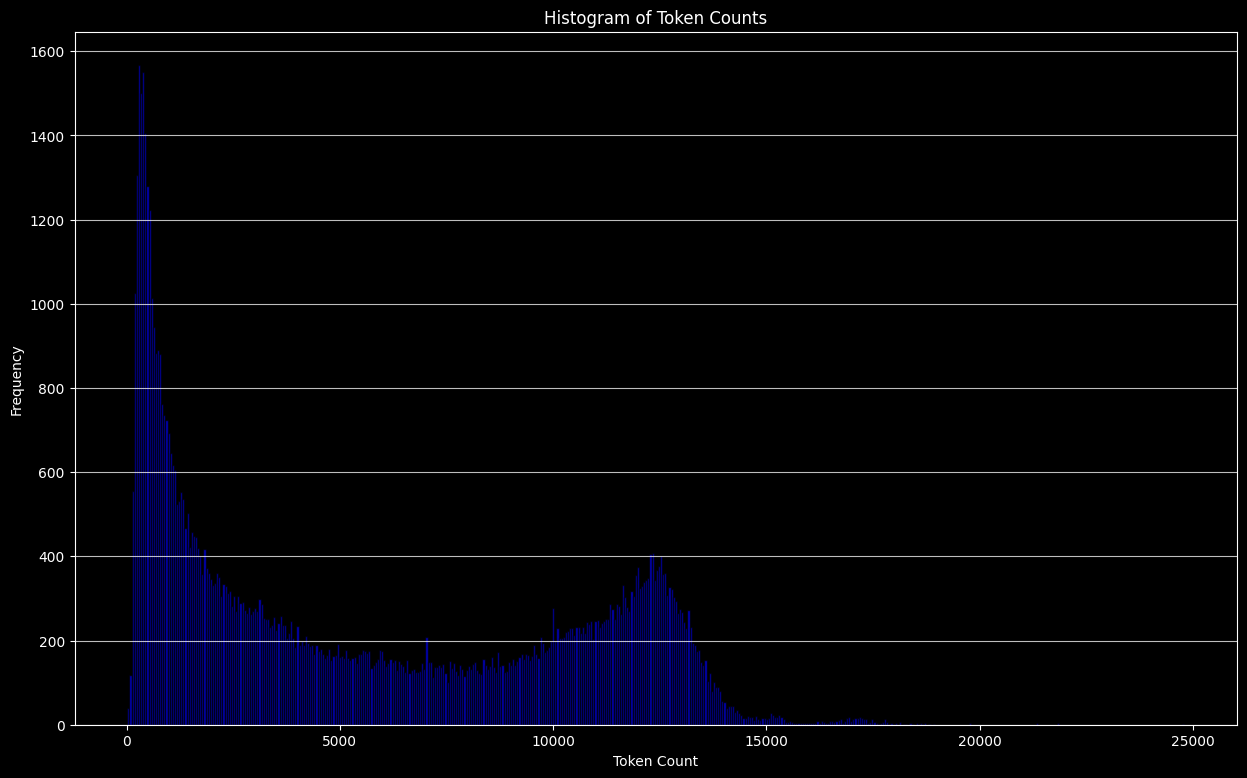

In [16]:
import matplotlib.pyplot as plt
import tiktoken


plt.figure(figsize=(15, 9))
plt.hist(counts, bins=500, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

plt.show

In [31]:
d_sorted = sorted(finaldocs, key=lambda x: x.metadata["ACCN"])
d_reversed = list(reversed(d_sorted))
concatenated_content = "\n\n\n --- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)

print(
    "Num tokens in all context: %s"
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)


Num tokens in all context: 9866841


In [32]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.chat_models import ChatOllama
import os 





def load_embedding_model(config={}):
    embeddings = SentenceTransformerEmbeddings(
        model_name="all-MiniLM-L6-v2", cache_folder="/embedding_model"
    )
    dimension = 384
    return embeddings, dimension    
def load_llm(llm_name: str, config={}):
    return ChatOllama(
                temperature=0,
                base_url=config["ollama_base_url"],
                model=llm_name,
                streaming=True,
                # seed=2,
                top_k=10,  # A higher value (100) will give more diverse answers, while a lower value (10) will be more conservative.
                top_p=0.3,  # Higher value (0.95) will lead to more diverse text, while a lower value (0.5) will generate more focused text.
                num_ctx=8192,  # Sets the size of the context window used to generate the next token.
            ) 

In [33]:
from dotenv import load_dotenv
load_dotenv(".env")

url = os.getenv("NEO4J_URI")
username = os.getenv("NEO4J_USERNAME")
password = os.getenv("NEO4J_PASSWORD")
ollama_base_url = os.getenv("OLLAMA_BASE_URL")
embedding_model_name = os.getenv("EMBEDDING_MODEL")
llm_name = os.getenv("LLM")
# Remapping for Langchain Neo4j integratio

print(llm_name)


embd, dimension = load_embedding_model()
model = load_llm(llm_name, {"ollama_base_url": ollama_base_url})

llama3:8b-instruct-q5_K_M


c:\Users\Jens\AppData\Local\pypoetry\Cache\virtualenvs\data-sienc-visuel-mvgrUAeD-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jens\AppData\Local\pypoetry\Cache\virtualenvs\data-sienc-visuel-mvgrUAeD-py3.10\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [34]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture

In [35]:

RANDOM_SEED = 224

def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    Perform global dimensionality reduction on the embeddings using UMAP.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - n_neighbors: Optional; the number of neighbors to consider for each point.
                   If not provided, it defaults to the square root of the number of embeddings.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    Perform local dimensionality reduction on the embeddings using UMAP, typically after global clustering.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - num_neighbors: The number of neighbors to consider for each point.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    Determine the optimal number of clusters using the Bayesian Information Criterion (BIC) with a Gaussian Mixture Model.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - max_clusters: The maximum number of clusters to consider.
    - random_state: Seed for reproducibility.

    Returns:
    - An integer representing the optimal number of clusters found.
    """
    max_clusters = min(max_clusters, len(embeddings))
    n_clusters = np.arange(1, max_clusters)
    bics = []
    for n in n_clusters:
        gm = GaussianMixture(n_components=n, random_state=random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
    return n_clusters[np.argmin(bics)]


def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Cluster embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - threshold: The probability threshold for assigning an embedding to a cluster.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the number of clusters determined.
    """
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters


def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    Perform clustering on the embeddings by first reducing their dimensionality globally, then clustering
    using a Gaussian Mixture Model, and finally performing local clustering within each global cluster.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for UMAP reduction.
    - threshold: The probability threshold for assigning an embedding to a cluster in GMM.

    Returns:
    - A list of numpy arrays, where each array contains the cluster IDs for each embedding.
    """
    if len(embeddings) <= dim + 1:
        # Avoid clustering when there's insufficient data
        return [np.array([0]) for _ in range(len(embeddings))]

    # Global dimensionality reduction
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # Global clustering
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # Iterate through each global cluster to perform local clustering
    for i in range(n_global_clusters):
        # Extract embeddings belonging to the current global cluster
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # Handle small clusters with direct assignment
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # Local dimensionality reduction and clustering
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # Assign local cluster IDs, adjusting for total clusters already processed
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


### --- Our code below --- ###


def embed(texts):
    """
    Generate embeddings for a list of text documents.

    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.

    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = embd.embed_documents(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.

    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.

    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization
    template = """System: This is a chat between a user and an artificial intelligence assistant.
     
    The assistant gives helpful, detailed, and polite answers to the user's questions based on the context. 
    
    Her is a sub-set of Danish law text, use the following pieces of context to give a detailed summarization. Write this summarization in Danish.
    Danish law text:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # Format text within each cluster for summarization
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.

    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results

In [36]:
leaf_texts = final_docs_texts
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=4)

--Generated 285 clusters--
--Generated 56 clusters--
--Generated 8 clusters--
--Generated 1 clusters--


In [ ]:
all_texts = leaf_texts.copy()

for level in sorted(results.keys()):
    # Extract summaries from the current level's DataFrame
    summaries = results[level][1]["summaries"].tolist()
    print(summaries)
    # Extend all_texts with the summaries from the current level
    all_texts.extend(summaries)
    
    

In [ ]:
from langchain_community.vectorstores import Neo4jVector
from langchain.chains import RetrievalQA
from langchain.callbacks.base import BaseCallbackHandler
from dotenv import load_dotenv

In [ ]:
from langchain_community.vectorstores import Neo4jVector
from langchain.chains import RetrievalQA
from langchain.callbacks.base import BaseCallbackHandler
from dotenv import load_dotenv




load_dotenv(".env")
url = os.getenv("NEO4J_URI")
username = os.getenv("NEO4J_USERNAME")
password = os.getenv("NEO4J_PASSWORD")
ollama_base_url = os.getenv("OLLAMA_BASE_URL")
os.environ["NEO4J_URL"] = url

vectorstore = Neo4jVector.from_texts(
            all_texts,
            url=url,
            username=username,
            password=password,
            embedding=embd,
            index_name="raptor",
            node_label="raptor_node",
            pre_delete_collection=True,  # Delete existing PDF datac
        )

qa = RetrievalQA.from_chain_type(
        llm=model, chain_type="stuff", retriever=vectorstore.as_retriever()
    )

In [ ]:

from langchain import hub
from langchain_core.runnables import RunnablePassthrough



qa.invoke("User: hvad er den danske lov for indsamlinger? svar gerne med 5 punkter", callback=BaseCallbackHandler())